# Preprocessing Videos

In [6]:
# Get video list, and convert to picture
import os

folder_path = '../Dataset/video'
file_names = [files for files in os.listdir(folder_path) if files.endswith(".mp4")]

print("Video List:")
print(file_names)

path_list = []
for name in file_names:
    path_list.append(os.path.join(folder_path, name))

print("Video Paths:")
print(path_list)


Video List:
['Communal1.mp4', 'Communal2.mp4', 'VA1.mp4', 'VA2.mp4', 'VA3.mp4', 'VA4.mp4']
Video Paths:
['../Dataset/video\\Communal1.mp4', '../Dataset/video\\Communal2.mp4', '../Dataset/video\\VA1.mp4', '../Dataset/video\\VA2.mp4', '../Dataset/video\\VA3.mp4', '../Dataset/video\\VA4.mp4']


# Only Frames

In [7]:
import cv2
import os

for video in path_list: 
    video_name = video
    print("Processing video: " + file_names[path_list.index(video)])

    cap = cv2.VideoCapture(video_name)

    time_skips = float(1000) #skip every 1 seconds. modify if need

    count = 0
    success,image = cap.read()
    while success:
        # save image
        img_name =  file_names[path_list.index(video)][:-4] + "/frame%d.jpg" % count
        cv2.imwrite("../Dataset/images/Original/" + img_name, image)

        cap.set(cv2.CAP_PROP_POS_MSEC, (count*time_skips))
        print('New frame captured: ' + str(count))

        # move the time
        success,image = cap.read()
        count += 1

    # release after reading    
    cap.release()

print("Finish Processing all videos.")

Processing video: Communal1.mp4
New frame captured: 0
New frame captured: 1
New frame captured: 2
New frame captured: 3
New frame captured: 4
New frame captured: 5
New frame captured: 6
New frame captured: 7
New frame captured: 8
New frame captured: 9
New frame captured: 10
New frame captured: 11
New frame captured: 12
New frame captured: 13
New frame captured: 14
New frame captured: 15
New frame captured: 16
New frame captured: 17
New frame captured: 18
New frame captured: 19
New frame captured: 20
New frame captured: 21
New frame captured: 22
New frame captured: 23
New frame captured: 24
New frame captured: 25
New frame captured: 26
New frame captured: 27
New frame captured: 28
New frame captured: 29
New frame captured: 30
New frame captured: 31
New frame captured: 32
New frame captured: 33
New frame captured: 34
New frame captured: 35
New frame captured: 36
New frame captured: 37
New frame captured: 38
New frame captured: 39
New frame captured: 40
New frame captured: 41
New frame ca

Preprocessing label with image-frames

In [11]:
# Processing data and label in every frame
import jsonlines # read annotation from .jsonl file
import os

# load images
root = "../Dataset/label"
label_files = [files for files in os.listdir(folder_path) if files.endswith(".jsonl")]

# print("Video List:")
# print(file_names)

customerNum = []
for file in label_files: 
    print(file)
    if os.path.exists(file):
        # print('File exists')
        with jsonlines.open(file) as reader:
            # save annotation and file name into list
            for line in reader:
                num = line['customernum']
                customerNum.append(num)
    else:
        raise ValueError('Invalid label file path [%s]'%file)

print(customerNum)

# Get number of frames in every video
import fnmatch

folder_dict = {}

for path, dirs, files in os.walk('../Dataset/images/Original'):
    folder_name = os.path.basename(path)
    file_count = len(fnmatch.filter(files, '*.jpg'))
    folder_dict[folder_name] = file_count

print(folder_dict) # number of frames

[]
{'Original': 0, 'Communal1': 57, 'Communal2': 75, 'VA1': 25, 'VA2': 125, 'VA3': 93, 'VA4': 92}


# HOG + SVM

In [5]:
import cv2

# Initialize HOG person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

for video in path_list: 
    video_name = video
    print("Processing video: " + file_names[path_list.index(video)])

    # Open video
    cap = cv2.VideoCapture(video_name)

    time_skips = float(1000) #skip every 1 seconds. modify if need

    count = 0
    success,image = cap.read()
    while success:
            
        # Detect people in the image
        boxes, weights = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)

        # Draw rectangle around each person
        for (x, y, w, h) in boxes:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        
        # save image
        img_name =  file_names[path_list.index(video)][:-4] + "/frame%d.jpg" % count
        cv2.imwrite("../Dataset/images/HOG/"+ img_name, image) 
        
        # Count the number of people detected
        num_people = len(boxes)
        print('Number of people detected:', num_people)
        
        cap.set(cv2.CAP_PROP_POS_MSEC, (count*time_skips))
        print('New frame captured: ' + str(count))

        # move the time
        success,image = cap.read()
        count += 1

    # release after reading    
    cap.release()

Processing video: Communal1.mp4
Number of people detected: 10
New frame captured: 0
Number of people detected: 10
New frame captured: 1
Number of people detected: 8
New frame captured: 2
Number of people detected: 8
New frame captured: 3
Number of people detected: 11
New frame captured: 4
Number of people detected: 10
New frame captured: 5
Number of people detected: 13
New frame captured: 6
Number of people detected: 9
New frame captured: 7
Number of people detected: 14
New frame captured: 8
Number of people detected: 8
New frame captured: 9
Number of people detected: 8
New frame captured: 10
Number of people detected: 6
New frame captured: 11
Number of people detected: 13
New frame captured: 12
Number of people detected: 15
New frame captured: 13
Number of people detected: 13
New frame captured: 14
Number of people detected: 17
New frame captured: 15
Number of people detected: 15
New frame captured: 16
Number of people detected: 22
New frame captured: 17
Number of people detected: 20


### Accuracy for HOG + SVM

# YOLOv5
Using YOLOv5 model to detect people in picture

In [ ]:

%cd content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

from yolov5 import utils
display = utils.notebook_init()

!python detect.py --weights yolov5s.pt --img 256 --conf 0.25 --source ../Dataset/images/Original/Communal1

%cd ../..


YOLOv5  2024-4-29 Python-3.9.7 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)


Setup complete  (16 CPUs, 15.7 GB RAM, 438.6/727.5 GB disk)
^C


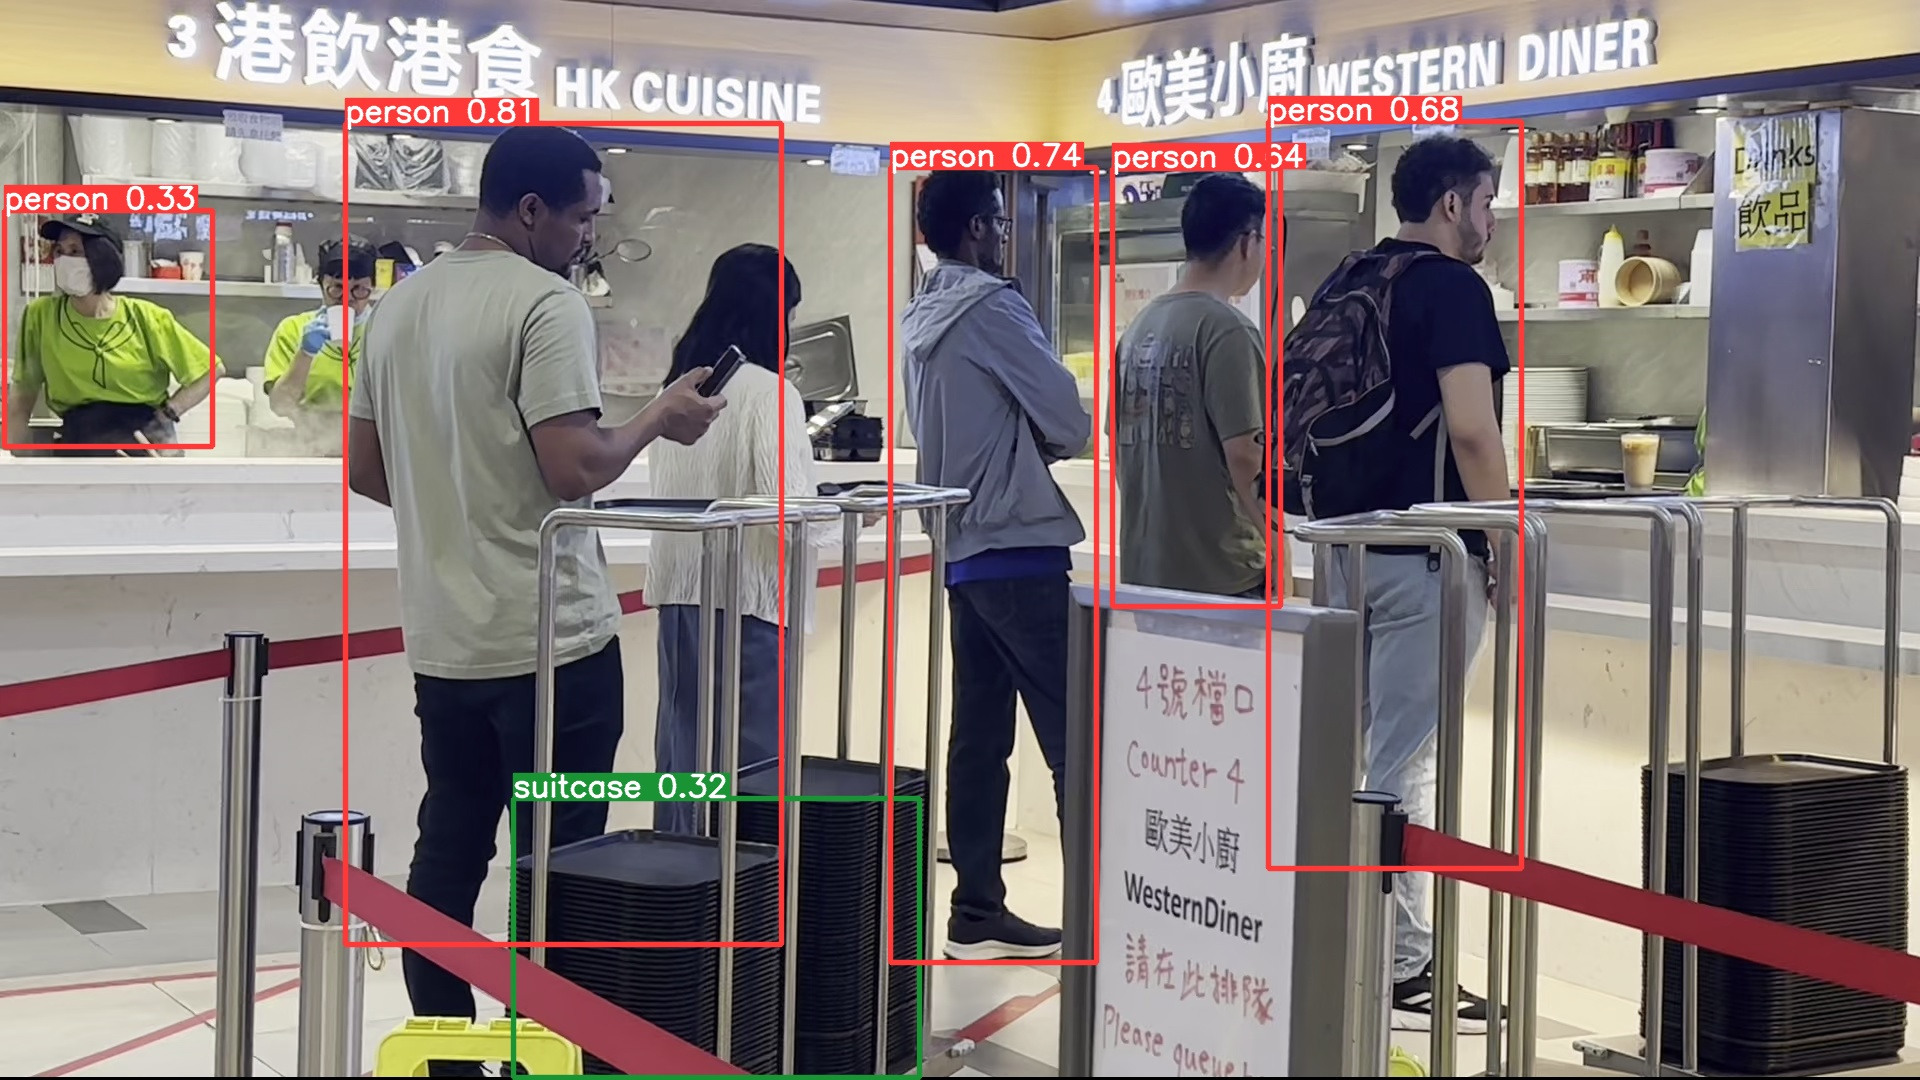

In [ ]:
path = "runs/detect/exp"
for filename in path:

    display.Image(filename='runs/detect/exp/frame1.jpg', width=200)

### Validate with COCO datasets

In [ ]:
# import torch
# # Download COCO val
# torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
# !unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip
# # Validate YOLOv5s on COCO val
# !python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

100%|██████████| 780M/780M [02:01<00:00, 6.74MB/s] 
'unzip' is not recognized as an internal or external command,
operable program or batch file.


^C


# Faster R-CNN

In [3]:

import torchvision
import cv2
import numpy as np
import torch
import torchvision.transforms as T

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the video

cap = cv2.VideoCapture('../Dataset/video/VA1.mp4')

# Initialize frame counter
frame_counter = 0
seconds = 0

fps = cap.get(cv2.CAP_PROP_FPS)


while(cap.isOpened()):
    # Set the position in the video to the current second
    cap.set(cv2.CAP_PROP_POS_MSEC, seconds * 1000)
    # Read the next frame
    ret, frame = cap.read()

    if ret == True:
        frame_model = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_model = frame_model / 255.0
        frame_model = np.transpose(frame_model, (2, 0, 1))
        frame_model = torch.from_numpy(frame_model).float()

        # Apply the Faster R-CNN model to the frame
        output = model([frame_model])

         # Apply non-maximum suppression
        nms_indices = torchvision.ops.nms(output[0]['boxes'], output[0]['scores'], 0.3)
        output[0]['boxes'] = output[0]['boxes'][nms_indices]
        output[0]['labels'] = output[0]['labels'][nms_indices]

        # Filter out the detections with low confidence scores
        high_conf_indices = [i for i, score in enumerate(output[0]['scores']) if score > 0.7]
        output[0]['boxes'] = output[0]['boxes'][high_conf_indices]
        output[0]['labels'] = output[0]['labels'][high_conf_indices]

        # Count the number of people detected in the frame
        num_people = sum(1 for box, label in zip(output[0]['boxes'], output[0]['labels']) if label == 1)

        # Draw bounding boxes around the detected people
        for box, label in zip(output[0]['boxes'], output[0]['labels']):
            if label == 1:
                cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
        
        # Save the frame
        cv2.imwrite(f'../Dataset/images/RCNN/frame{frame_counter}.jpg', frame)

        # Increment frame counter
        frame_counter += 1
        seconds += 1

        # Print the number of people detected in the frame along with the frame number
        print(f'Frame {frame_counter}: Number of people: {num_people}')
    else:
        break

# Release the video capture
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()

Frame 1: Number of people: 3
Frame 2: Number of people: 5
Frame 3: Number of people: 3
Frame 4: Number of people: 4
Frame 5: Number of people: 4
Frame 6: Number of people: 4
Frame 7: Number of people: 4
Frame 8: Number of people: 1
Frame 9: Number of people: 2
Frame 10: Number of people: 3
Frame 11: Number of people: 3
Frame 12: Number of people: 2
Frame 13: Number of people: 1
Frame 14: Number of people: 2
Frame 15: Number of people: 1
Frame 16: Number of people: 2
Frame 17: Number of people: 3
Frame 18: Number of people: 2
Frame 19: Number of people: 1
Frame 20: Number of people: 2
Frame 21: Number of people: 3
Frame 22: Number of people: 4
Frame 23: Number of people: 4
Frame 24: Number of people: 3
